## Multiple Regression

Until now, we have done our best to produce interesting results while using only a single independent variable as a predictor for our dependent variable. However, this is rarely sufficient. Usually, we will need to incorporate the effects of multiple independent variables in order to make accurate predictions. Consider, for example, the problem of store sales prediction using the data below:

In [1]:
sales.df <- read.csv("data/store-sales-multiple-regression.csv")
head(sales.df)

store.size,employee.morale.store.avg,sales
<int>,<dbl>,<dbl>
17000,3.3,76.81814
17000,6.0,84.86610
15000,6.4,87.38654
13000,8.3,81.06863
14000,4.9,70.56217
15000,6.8,72.91949


When we previously looked at this problem, we examined only the impact of a single factor at a time - either `store.size` or `employee.morale.store.avg`. For example, by building a linear model of the impact of `store.size` on `sales`, we have made the assumption that increasing `store.size` by a fixed amount will increase `sales` by a proportionate amount. Fitting a linear model to our data allowed us to precisely calculate how much `sales` would increase (on average) for each increase in `store.size`. 

However, our previous single-variable models could not answer more complex questions such as: "If I increase employee morale by one point *and* store size by 2000 meters sq, what is your best guess for my new sales numbers?" In order to answer questions like this one, we will build a *multiple regression model* that includes the effects of both of our independent variables simultaneously:

In [2]:
model.multiple <- lm(sales ~ employee.morale.store.avg + store.size,  data=sales.df)

Notice that our formula `sales ~ employee.morale.store.avg + store.size` specifies all of the independent variables that we wish to include, separated by a `+` sign. Having now produced our multiple regression model, we can investigate its details using `summary`:

In [3]:
summary(model.multiple)


Call:
lm(formula = sales ~ employee.morale.store.avg + store.size, 
    data = sales.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9283 -3.2170 -0.2815  2.5527 12.0671 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               5.7209249  5.0788435   1.126 0.264707    
employee.morale.store.avg 2.2056554  0.6034539   3.655 0.000562 ***
store.size                0.0040086  0.0002167  18.502  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.76 on 57 degrees of freedom
Multiple R-squared:  0.8573,	Adjusted R-squared:  0.8523 
F-statistic: 171.2 on 2 and 57 DF,  p-value: < 2.2e-16


This model has an `(Intercept)` term, just like our single-variable models. In multiple regression, the `(Intercept)` is the *y* value predicted by the model when *all* predictor variables are zero. We can also see that there is a coefficient (slope) associated with *each* of our predictor variables - `2.2056554` for `employee.morale.store.avg` and `0.0040086` for `store.size`. Note that just because the coefficient of `employee.morale.store.avg` is larger does not necessarily mean that this variable is more important - we cannot tell this by looking at the coefficients alone because `store.size` is measured in different units.

## Using Multiple Regression for Predictions

We can use `predict` to generate new predictions using our multiple regression model. We simply need to pass a valid value for each of the predictor variables in our model. For example, to predict sales of a hypothetical store with `employee.morale.store.avg=7.5` and `store.size=13500`, we could do the following:

In [4]:
predict(
    model.multiple, 
    newdata=data.frame("employee.morale.store.avg"=7.5, "store.size"=13500)
)

1 
76.37887

We can also generate a prediction interval in order to assess the uncertainty in our prediction:

In [5]:
predict(
    model.multiple, 
    newdata=data.frame("employee.morale.store.avg"=7.5, "store.size"=13500),
    interval="predict"
)

fit,lwr,upr
76.37887,66.57802,86.17973


## Visualizing Multiple Regression Models

While we have previously relied on straightforward 2d scatter plots to visualize the relationships in our data, it is very important to understand that such scatter plots containing the dependent variable and only one independent variable do not accurately represent multiple regression problems. For example, consider the following scatter plot that attempts to characterize the relationship between `employee.morale.store.avg` and `sales`:

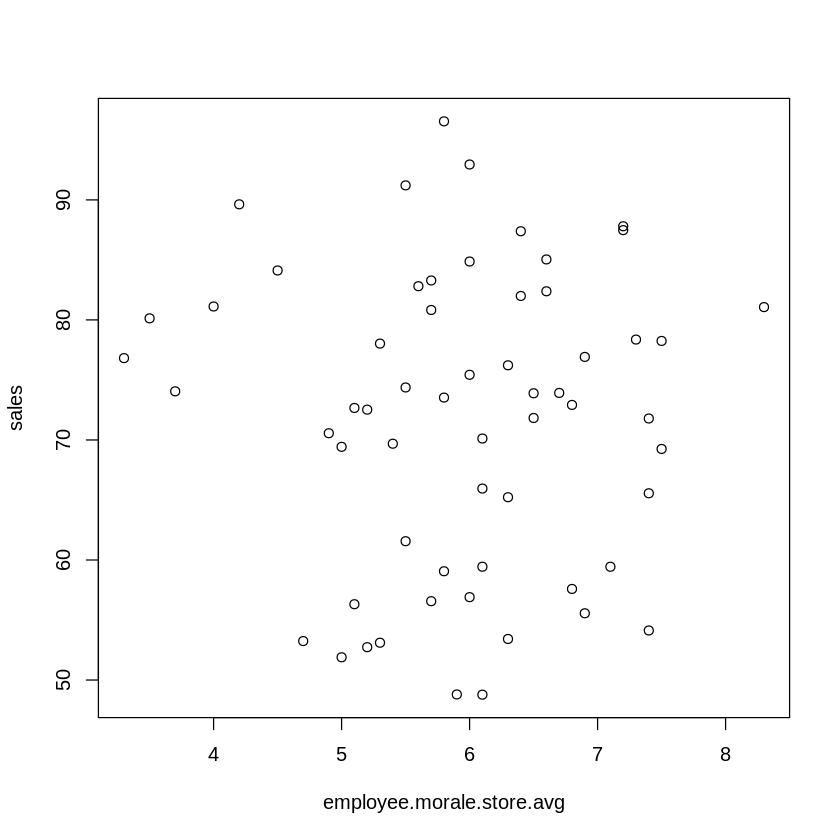

In [6]:
plot(
    sales ~ employee.morale.store.avg,
    data=sales.df
)

This relationship looks *very* weak; it certainly looks nothing like the strong positive relationship identified by our multiple regression model. When there are multiple important predictor variables, scatter plots of any single one cannot show the combined effect of all of these variables and will paint an inaccurate picture.

In order to visualize this data properly, we'll need to draw it in three dimensions so that both of our predictor variables can be accounted for. To do this, we'll need the `plot3D` package: 

In [7]:
library(plot3D)

We can now create a three-dimensional plot of our data:

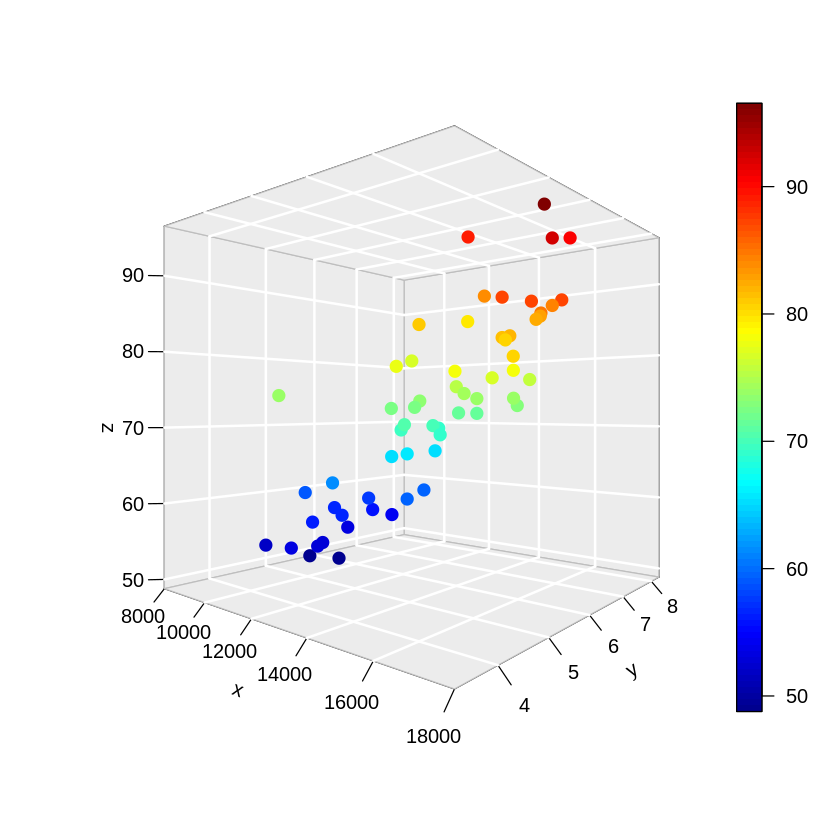

In [8]:
scatter3D(
    x=sales.df$store.size,
    y=sales.df$employee.morale.store.avg,
    z=sales.df$sales,
    bty = "g",
    phi = 0,
    pch = 20,
    cex = 2, 
    ticktype = "detailed"
)

The important takeaway from this section is that a multiple regression model is not simply two independent single-variable regression models jammed together. The exercise below will fully illustrate this point:

<span style="color:blue;font-weight:bold">Exercise</span>: Perform the following actions:

* Create a linear model using only `store.size` as a predictor and store it the variable `model.store.size`
* Create a linear model using only `employee.morale.store.avg` as a predictor and store it the variable `model.employee.morale.store.avg`
* Print the `summary` of both of these models and compare their coefficients to the corresponding coefficients in our multiple regression model `model.multiple` - how different are they?

In [10]:
# delete this entire line and replace it with your code

model.store.size <- lm(sales ~ store.size, data=sales.df)
model.employee.morale.store.avg <- lm(sales ~ employee.morale.store.avg, data=sales.df)

In [11]:
correct.model.store.size <- lm(
    sales ~ store.size,
    data=sales.df
)
correct.model.employee.morale.store.avg <- lm(
    sales ~ employee.morale.store.avg,
    data=sales.df
)
check.variable.definition("model.store.size")
check.variable.definition("model.employee.morale.store.avg")
assert.true(all(coefficients(model.store.size) == coefficients(correct.model.store.size)), "Did you set <code>model.store.size</code> correctly?")
assert.true(all(coefficients(model.employee.morale.store.avg) == coefficients(correct.model.employee.morale.store.avg)), "Did you set <code>model.employee.morale.store.avg</code> correctly?")
success()

Correct!

In [11]:
summary(model.store.size)


Call:
lm(formula = sales ~ store.size, data = sales.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0254  -3.2314  -0.8838   3.3201  11.2321 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.080127   3.141669    6.71 8.99e-09 ***
store.size   0.003838   0.000233   16.47  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.243 on 58 degrees of freedom
Multiple R-squared:  0.8239,	Adjusted R-squared:  0.8208 
F-statistic: 271.3 on 1 and 58 DF,  p-value: < 2.2e-16


In [12]:
summary(model.employee.morale.store.avg)


Call:
lm(formula = sales ~ employee.morale.store.avg, data = sales.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.817 -11.985   1.689   9.362  24.905 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 72.821      9.329   7.806  1.3e-10 ***
employee.morale.store.avg   -0.204      1.546  -0.132    0.896    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.49 on 58 degrees of freedom
Multiple R-squared:  0.0003,	Adjusted R-squared:  -0.01694 
F-statistic: 0.0174 on 1 and 58 DF,  p-value: 0.8955


In [13]:
summary(model.multiple)


Call:
lm(formula = sales ~ employee.morale.store.avg + store.size, 
    data = sales.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9283 -3.2170 -0.2815  2.5527 12.0671 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               5.7209249  5.0788435   1.126 0.264707    
employee.morale.store.avg 2.2056554  0.6034539   3.655 0.000562 ***
store.size                0.0040086  0.0002167  18.502  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.76 on 57 degrees of freedom
Multiple R-squared:  0.8573,	Adjusted R-squared:  0.8523 
F-statistic: 171.2 on 2 and 57 DF,  p-value: < 2.2e-16
